# Exercícios - Cap 02

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
from math import *
from IPython.display import Image
from IPython.core.display import HTML 
plt.style.use('ggplot')

np.random.seed(1)

## Exercício 01

In [6]:
Image(url= "ex01.png")

In [5]:
Image(url= "ex01-b.png")

O que acontece é que as retas do primeiro sistema são mais próximas de serem coincidentes do que do segundo sistema como os coeficientes angulares.

Sistema 1:

$u_1 -  u_2 = -1 \rightarrow u_2 = u_1 + 1$

$21u_1 - 20 u_2 = -19 \rightarrow u_2 = \frac{21}{20}u_1 + \frac{19}{20}$
    
Sistema 2:

$u_1 - u_2 = -1 \rightarrow u_2 = u_1 + 1$

$3u_1 - u_2 = 1 \rightarrow u_2 = 3u_1 - 1$

 
Abaixo são apresentados os gráficos das retas.

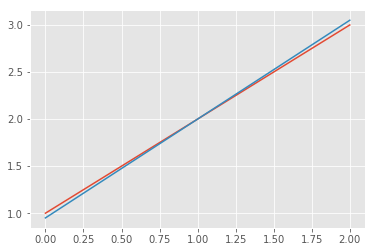

In [11]:
x=np.linspace(0, 2, endpoint=True, num=50)
y1 = 1 + x
y2 = (1.0/20)*(21*x+19)

plt.plot(x, y1)
plt.plot(x,y2)

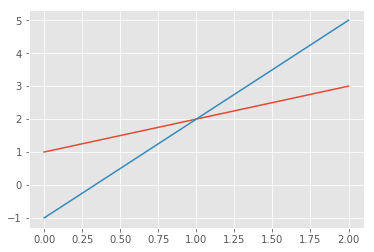

In [13]:
x=np.linspace(0, 2, endpoint=True, num=50)
y1 = 1.0 + x
y2 = -1.0+3*x

plt.plot(x, y1)
plt.plot(x,y2)

In [17]:
Image(url= "ex02.png")

$ r = b - Ax $

$ e = x^* - x \rightarrow x = x^* - e$

Substituindo $x$ na primeira equação.

$ r = b - A (x^* - e) $

$ r = b - A x^* + Ae $

Mas como $ Ax^* = b $

$ r = b - b + Ae $

$ Ae = r $

In [15]:
Image(url= "ex03.png")

a)

Component form Jacobi:

$v_j^{i+1} = \frac{1}{2} (v_{j-1}^{i} + v_{j+1}^{i} + h^2f) $

Component form Weighted-Jacobi:

$v_j^{i+1} = (1-w)v_j^i + \frac{w}{2} (v_{j-1}^{i} + v_{j+1}^{i} + h^2f_j) $

Passando para a forma matricial

$v^{i+1} = I(1-w)v^i + \frac{w}{2} \begin{bmatrix}
0 & 1 & 0  &...  & 0\\ 
1 & 0 & 1 & ... &  0\\ 
0 & 1 & 0 & \\ 
 &  &\ddots  &  &\\
 &  & & 0 & 1\\
& & &1 & 0
\end{bmatrix} v^i + \frac{w}{2}h^2f$


Com as definições:

$A = \frac{1}{h^2}\begin{bmatrix}
2 & -1 & 0  & ...  & 0\\ 
-1 & 2 & -1 & ... &  0\\ 
0 & -1 & 2 & \\ 
 &  &\ddots  &  &\\
 &  & & 2 & -1\\
& & &-1 & 2
\end{bmatrix}$ 

$L = \frac{1}{h^2}\begin{bmatrix}
0 & 0 & 0  & ...  & 0\\ 
1 & 0 & 0 & ... &  0\\ 
0 & 1 & 0 & \\ 
 &  &\ddots  &  &\\
 &  & & 0 & 0\\
& & &1 & 0
\end{bmatrix}   
U = \frac{1}{h^2}\begin{bmatrix}
0 & 1 & 0  & ...  & 0\\ 
0 & 0 & 1 & ... &  0\\ 
0 & 0 & 0 & \\ 
 &  &\ddots  &  &\\
 &  & & 0 & 1\\
& & & 0& 0
\end{bmatrix}
D = \frac{1}{h^2}\begin{bmatrix}
2 & 0 & 0  & ...  & 0\\ 
0 & 2 & 0 & ... &  0\\ 
0 & 0 & 2 & \\ 
 &  &\ddots  &  &\\
 &  & & 2 & 0\\
& & & 0& 2
\end{bmatrix}$

$A = D - L - U$

Dessa forma,

$v^{i+1} = I(1-w)v^i + \frac{w}{2} h^2 I (L+U) v^i + \frac{w}{2}h^2f$


Além disso, $D^{-1} = \frac{h^2}{2}I$

$v^{i+1} = I(1-w)v^i + w D^{-1} (L+U) v^i + w D^{-1} f$


Com a definição, $R_j = D^{-1}(L+U)$

$v^{i+1} = I(1-w)v^i + w R_j v^i + w D^{-1} f \rightarrow v^{i+1} = ((1-w)I + w R_j )v^i + w D^{-1} f$

b)

Como $R_w = (1-w)I + w R_j $

$v^{i+1} = ((1-w)I + w R_j )v^i + w D^{-1} f$

$v^{i+1} = R_wv^i + w D^{-1} f$

c)

$r = f -  A v \rightarrow r^i = f - (D-L-U)v^i$

$f = r^i + (D-L-U)v^i $

Substituindo na equacao $v^{i+1} = ((1-w)I + w R_j )v^i + w D^{-1} f$:

$v^{i+1} = ((1-w)I + w R_j )v^i + w D^{-1}(r^i + (D-L-U)v^i) $

$v^{i+1} = ((1-w)I + w R_j )v^i + w D^{-1}(D-L-U)v^i+ w D^{-1}r^i  $

$v^{i+1} = ((1-w)I + w R_j )v^i + w D^{-1}Dv^i -  D^{-1}(L+U)v^i+ w D^{-1}r^i  $

$v^{i+1} = (1-w)v^i + w R_j v^i + w v^i -  R_j v^i+ w D^{-1}r^i  $

$v^{i+1} = v^i + w D^{-1}r^i  $

d)

$R_w = (1-w)I + w R_j $

$ R_w = (1-w)I + w D^{-1}(L+U) $

$ A = D - L - U \rightarrow L+U= D-A$

$ R_w = (1-w)I + w D^{-1}(D-A) $

$ R_w = I - wI + w D^{-1}D - w D^{-1}A  $

$ R_w = I - wI + w I + w D^{-1}A$

$ R_w = I  - w D^{-1}A $

$ R_w = I  - \frac{wh^2}{2}A $

In [20]:
Image(url= "ex04.png")

a)

Pensando indutivamente...

$ v^1 = R v^0 + Bf $

$ v^2 = R v^1 + Bf = R(R v^0 + Bf) + Bf = R^2 v^0 + RBf + Bf$

$ v^3 = R v^2 + Bf = R(R^2 v^0 + RBf + Bf) + Bf = R^3 v^0 + R^2Bf + RBf + Bf$

Assim,

$v^m = R^m v^0 + \sum_{i=0}^{m-1}R^iBf$

$ C(f) = \sum_{i=0}^{m-1}R^iBf$

b)

$ r^0 = f-Av^0 \rightarrow f = r^0 + Av^0$

$ v^1 = (I-BA) v^0 + Bf \rightarrow v^1 = (I-BA) v^0 + B(r^0 + Av^0)$

$ v^1 = v^0 -B A v^0 + Br^0 + BAv^0 $

$ v^1 = v^0 + Br^0$

In [21]:
Image(url= "ex05.png")

## ????

In [22]:
Image(url= "ex06.png")

Basta mostrar que dada uma condição inicial para Au=f, existe uma condição inicial que se comporta de mesma maneira em Au=0. Assim, dada a condição inicial $u^0$  resíduo inicial é:

$ r^0 = f - Au^0 $

E o erro:

$ e^0 = u^* - u^0$

Partindo da equação da questao 4. Podemos encontrar a relacão do erro em cada iteração com o erro anterior.

$v^1 = v^0 + Br^0 \rightarrow u^*-v^1 = u^*-v^0 + Br^0$

$e^1 = e^0 + Br^0$

Olhando agora para o problema $Au=0$. Para a condição inicial :

$ u^\prime = - u^* + u^0 $ o residuo é:

$ r^0 = 0 - A(- u^* + u^0) = Au^*-Au^0  = f-Au^0$

Que é igual ao resíduo anterior. Assim, pela equação $e^1 = e^0 + Br^0$ os erros das duas equações se comportarão da mesma maneira.
 


In [23]:
Image(url= "ex07.png")

Dado que $\rho(R)<1$ pois os métodos convergem. Então $ log_{10}\rho(R) <0$.

$\rho(R)=0.1$ é melhor pois converge mais rapidamente para 0

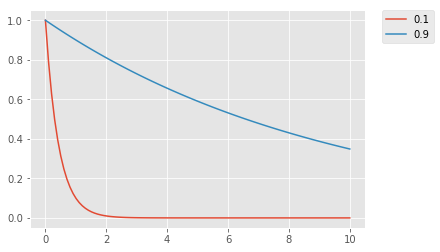

In [27]:
x = np.linspace(0, 10, num=100)

plt.plot(x, np.power(0.1,x), label="0.1")
plt.plot(x, np.power(0.9,x), label="0.9")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)